In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
sns.set_style("darkgrid")

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_df = pd.read_csv("sample_submission.csv")

In [4]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [5]:
test_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [6]:
train_df["stroke"].unique()

array([0, 1])

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [8]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [9]:
train_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [10]:
train_df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0
15303,15303,Female,14.0,0,0,No,Private,Rural,85.12,24.7,never smoked,0


In [11]:
train_df.duplicated().sum()

0

In [12]:
sorted(train_df["age"].unique().tolist())[0:20]

[0.08,
 0.16,
 0.24,
 0.32,
 0.4,
 0.48,
 0.56,
 0.64,
 0.68,
 0.72,
 0.8,
 0.88,
 1.0,
 1.08,
 1.16,
 1.24,
 1.3,
 1.32,
 1.4,
 1.48]

In [13]:
train_df["age"] = np.ceil(train_df["age"])
test_df["age"] = np.ceil(test_df["age"])

In [14]:
train_df["stroke"].value_counts()

stroke
0    14672
1      632
Name: count, dtype: int64

In [15]:
train_df.drop(train_df[train_df['gender']=='Other'].index, inplace=True)
test_df.drop(test_df[test_df['gender']=='Other'].index, inplace=True)

In [17]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

In [18]:
no_stroke_data = train_df[train_df["stroke"] == 0]
stroke_data = train_df[train_df["stroke"] == 1]

In [19]:
stroke_count = train_df["stroke"].value_counts()

In [20]:
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

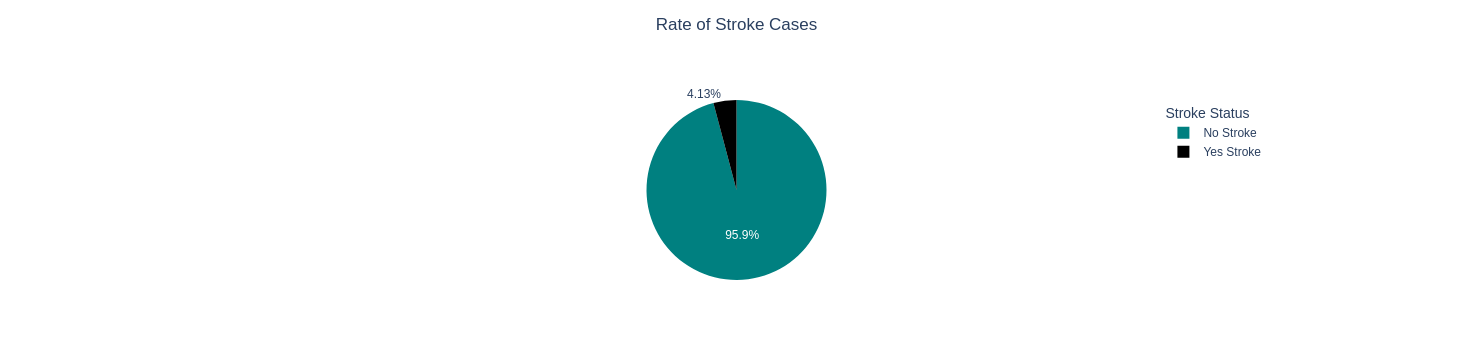

In [24]:
fig = px.pie(
    stroke_count, values=stroke_count.values, names=['No Stroke', 'Yes Stroke'], 
    title = 'Rate of Stroke Cases', 
    color_discrete_sequence=plot_color)

fig.update_layout(legend_title_text = 'Stroke Status', title_x=0.5, title_y = 0.95)
fig.show()

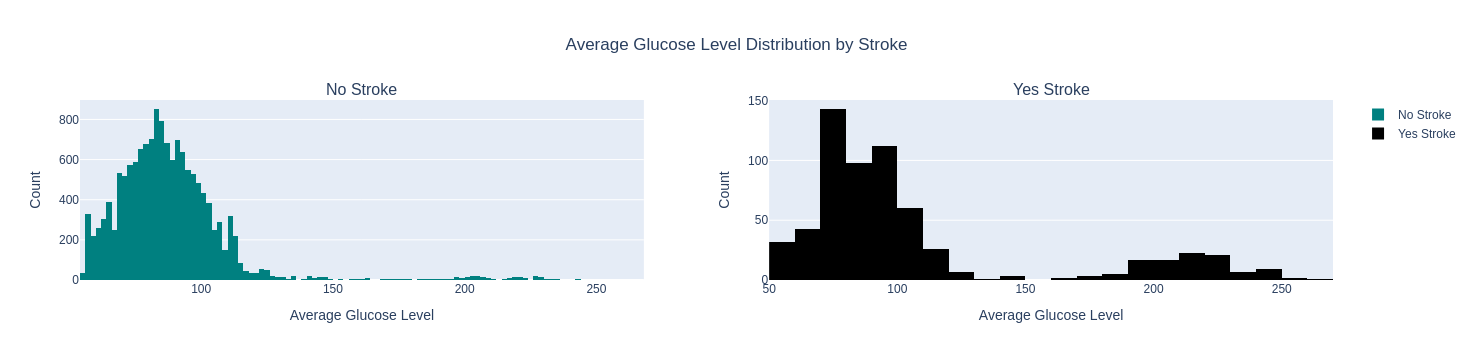

In [27]:
def custom_histogram(column: str, titles: list) -> go.Figure:
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['No Stroke', 'Yes Stroke'])
    fig.add_trace(
        go.Histogram(
            x=no_stroke_data[column], 
            marker_color='#008080', 
            name='No Stroke'
        ),
        row=1, col=1
    )
    fig.add_trace(
        go.Histogram(
            x=stroke_data[column], 
            marker_color='black', 
            name='Yes Stroke'
        ),
        row=1, col=2
    )
    fig.update_layout(
        title=titles[0], 
        title_x=0.5,
        showlegend=True 
    )
    fig.update_xaxes(title_text=titles[1], row=1, col=1)
    fig.update_xaxes(title_text=titles[1], row=1, col=2)
    fig.update_yaxes(title_text='Count', row=1, col=1)
    fig.update_yaxes(title_text='Count', row=1, col=2)
    
    return fig
fig = custom_histogram(
    'avg_glucose_level', 
    ['Average Glucose Level Distribution by Stroke', 'Average Glucose Level']
)
fig.show()

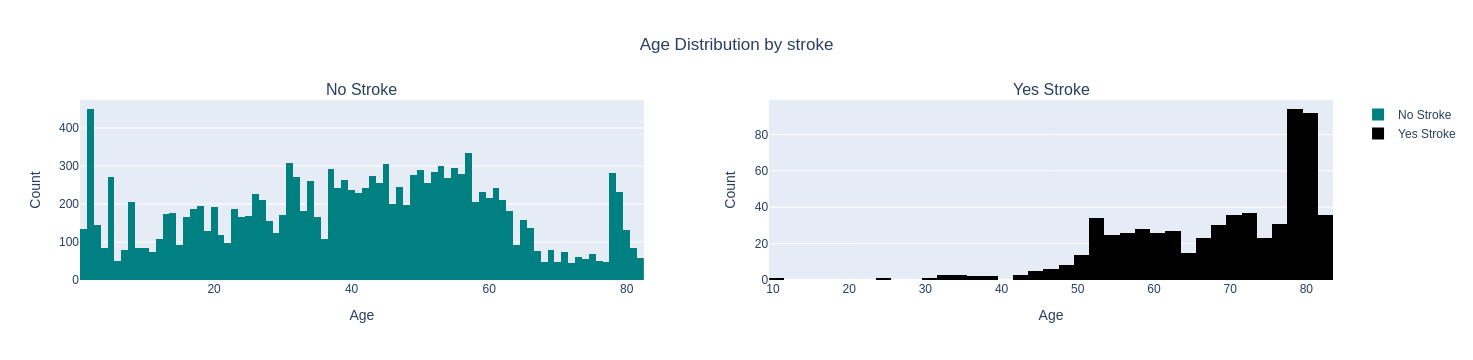

In [29]:
fig = custom_histogram('age', ['Age Distribution by stroke', 'Age'])
fig.show()

In [30]:
stroke_data["bmi"].mean()

30.230696202531643

In [31]:
no_stroke_data["bmi"].mean()

28.02217163110899

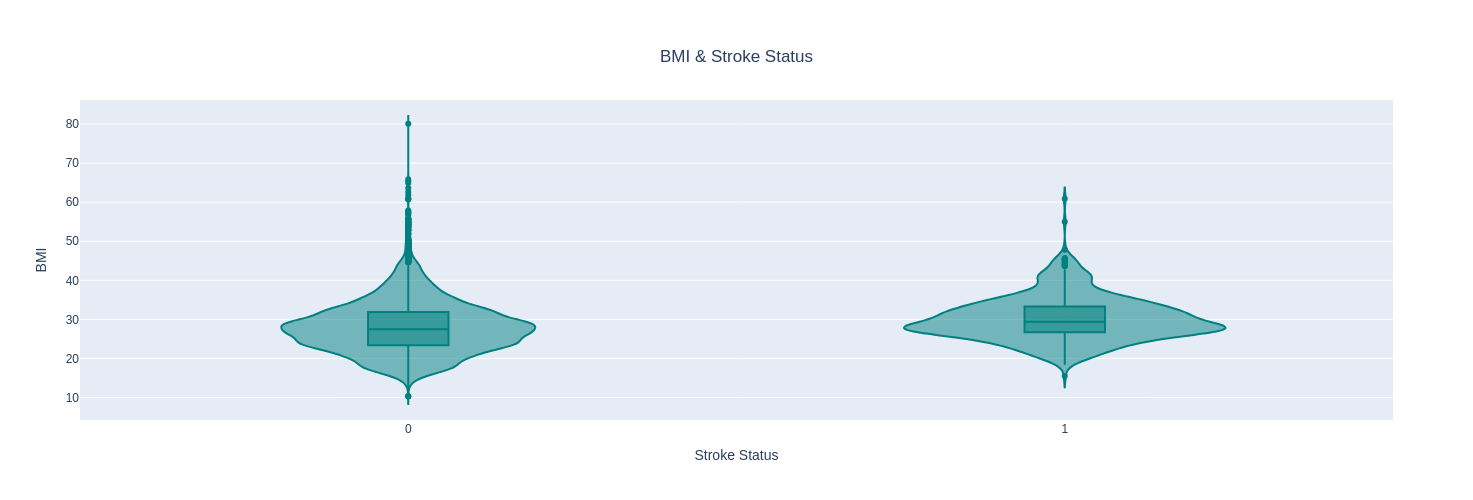

In [34]:
fig = px.violin(train_df, y = 'bmi', x='stroke', box=True, width=700, height=500, color_discrete_sequence=plot_color, 
                   title='BMI & Stroke Status', 
               labels={'stroke': 'Stroke Status', 'bmi': 'BMI'})
fig.update_layout(title_x = 0.5, title_y = 0.9)
fig.show()

In [35]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

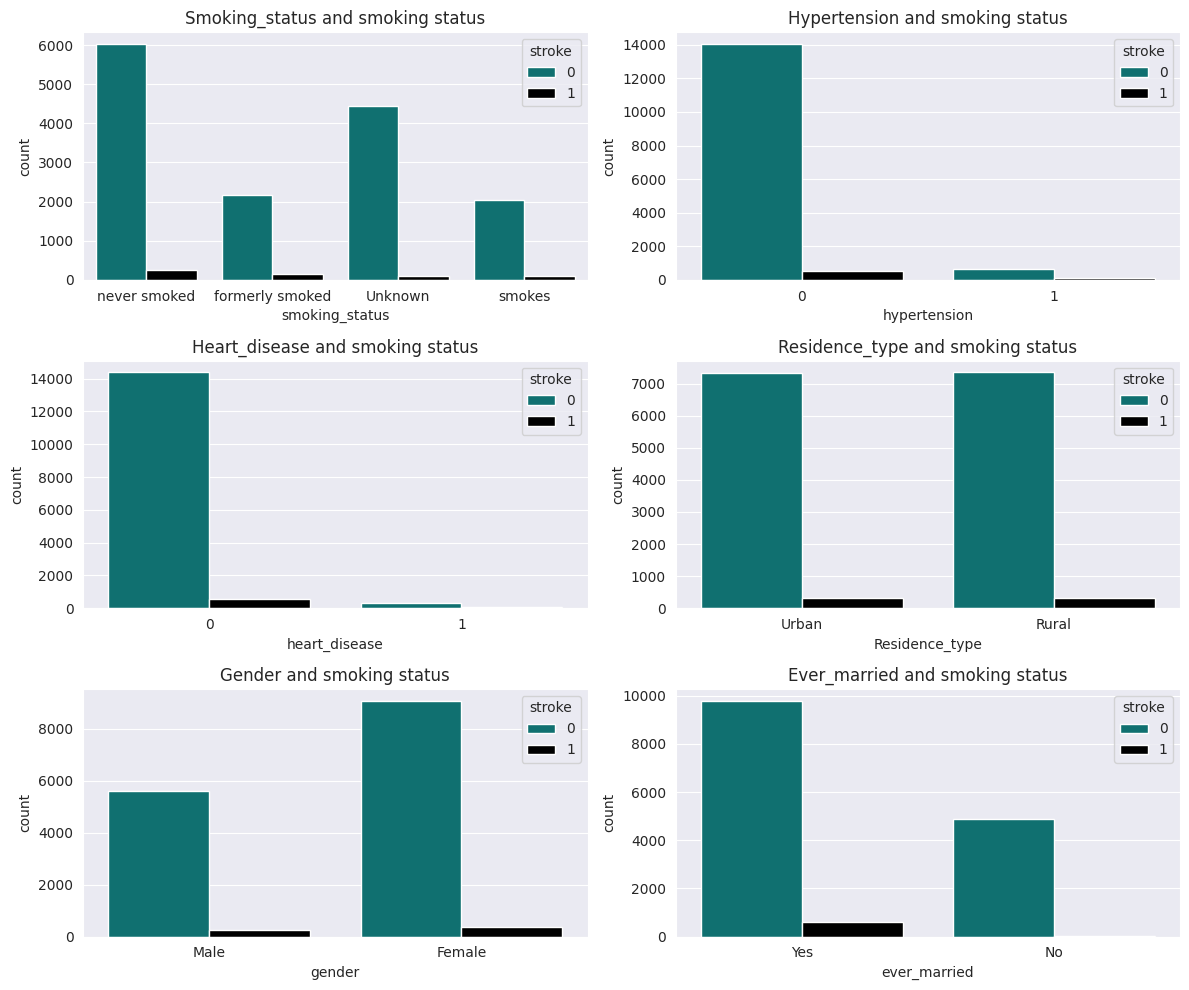

In [36]:
x_values = ['smoking_status', 'hypertension', 'heart_disease','Residence_type','gender', 'ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data = train_df, x = x_value, hue='stroke', ax = ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display="diagram")

In [38]:
input_cols = list(train_df)[1:-1]

In [39]:
target_col = "stroke"

In [40]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [41]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()

In [42]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()

In [43]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [44]:
categorical_cols = train_inputs.select_dtypes(include="object").columns.to_list()

In [45]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [46]:
train_df["smoking_status"]

0           never smoked
1        formerly smoked
2                Unknown
3           never smoked
4           never smoked
              ...       
15299       never smoked
15300       never smoked
15301       never smoked
15302            Unknown
15303       never smoked
Name: smoking_status, Length: 15303, dtype: object

In [47]:
categorical_cols.remove("smoking_status")

In [48]:
train_df["smoking_status"].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [54]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [55]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [56]:
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc,['smoking_status']), 
    ('OneHot_Encode', onehot_enc,categorical_cols)
]
)

In [57]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [58]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [59]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [60]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [61]:
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

X_test = test_inputs[numerical_cols + encoded_cols]

In [62]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
X_train.shape[1] == X_test.shape[1]

True

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [66]:
X_train.shape

(12242, 17)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [69]:
models = [
    (LogisticRegression(), 'LogisticRegression'), 
    (RandomForestClassifier(), 'RandomForestClassifier'), 
    (XGBClassifier(), 'XGBClassifier'), 
    (LGBMClassifier(verbose = 1), 'LightGBM')
]

In [70]:
def evalue_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [71]:
confusion_mats = {}
def metric_df(model, model_name):
    confusion_mat, *df = evalue_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuarcy','Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

In [72]:
predictions = []
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

/home/hta/anaconda3/envs/ai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [73]:
predictions

[                Model  Accuarcy  Precision    Recall        F1
 0  LogisticRegression  0.955243   0.333333  0.022388  0.041958,
                     Model  Accuarcy  Precision    Recall        F1
 0  RandomForestClassifier   0.95459   0.368421  0.052239  0.091503,
            Model  Accuarcy  Precision    Recall        F1
 0  XGBClassifier   0.95361   0.388889  0.104478  0.164706,
       Model  Accuarcy  Precision    Recall        F1
 0  LightGBM   0.95459   0.380952  0.059701  0.103226]

In [74]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [75]:
X_train_ns.shape

(23488, 17)

In [76]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)

/home/hta/anaconda3/envs/ai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [77]:
for model_name , confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()

Confusion Matrix for LogisticRegression
[[2921    6]
 [ 131    3]]

Confusion Matrix for RandomForestClassifier
[[2915   12]
 [ 127    7]]

Confusion Matrix for XGBClassifier
[[2905   22]
 [ 120   14]]

Confusion Matrix for LightGBM
[[2914   13]
 [ 126    8]]

Confusion Matrix for Logistic With SMOTE
[[2321  606]
 [  31  103]]



In [78]:
from sklearn.ensemble import VotingClassifier

In [79]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression())), 
estimator.append(('RandomForestClassifier', RandomForestClassifier())), 
estimator.append(('XGBClassifier', XGBClassifier())), 
estimator.append(('LightGBM', LGBMClassifier(verbose = 1)))

In [80]:
VC_hard = VotingClassifier(estimators=estimator, voting='hard')
VC_hard.fit(X_train, y_train)
VC_hard_mat = metric_df(VC_hard, 'VC_HARD')
predictions.append(VC_hard_mat)

/home/hta/anaconda3/envs/ai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [81]:
VC_hard_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_HARD,0.955243,0.333333,0.022388,0.041958


In [82]:
VC_soft = VotingClassifier(estimators=estimator, voting='soft')
VC_soft.fit(X_train, y_train)
VC_soft_mat = metric_df(VC_soft, 'VC_soft')
predictions.append(VC_soft_mat)

/home/hta/anaconda3/envs/ai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [83]:
VC_soft_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_soft,0.955897,0.466667,0.052239,0.09396


In [84]:
prediction_base = pd.concat(predictions, ignore_index=True, sort =False)
prediction_base = prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis = 'index')
prediction_base

Model,Accuarcy,Precision,Recall,F1
Logistic With SMOTE,0.791898,0.145275,0.768657,0.244365
XGBClassifier,0.953610,0.388889,0.104478,0.164706
LightGBM,0.954590,0.380952,0.059701,0.103226
RandomForestClassifier,0.954590,0.368421,0.052239,0.091503
VC_soft,0.955897,0.466667,0.052239,0.093960
LogisticRegression,0.955243,0.333333,0.022388,0.041958
VC_HARD,0.955243,0.333333,0.022388,0.041958


In [85]:
models_to_plot = [
    'LogisticRegression', 
    'RandomForestClassifier', 
    'XGBClassifier', 
    'Logistic With SMOTE'
]

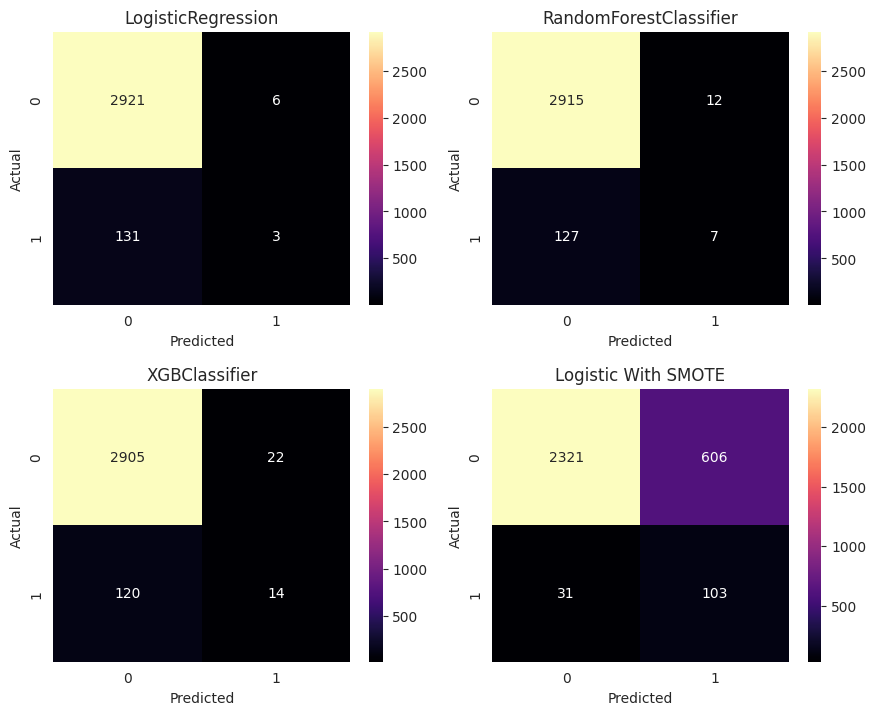

In [87]:
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (9, 7))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'magma', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import PredictionErrorDisplay

In [89]:
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

In [90]:
preds = lr_with_smote.predict(X_test)

In [91]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
sub_df = preds

In [93]:
pd.DataFrame(sub_df).to_csv("submission.csv", index=None)

In [94]:
sub_df = pd.read_csv("submission.csv")

In [95]:
sub_df.head()

,0
0,0
1,0
2,0
3,1
4,0


In [96]:
sub_df['stroke'] = preds

In [97]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [98]:
single_input = {
    'gender': 'Male', 
    'age': 33, 
    'hypertension':0,
    'heart_disease': 0, 
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [99]:
input_df = pd.DataFrame([single_input])

In [100]:
input_df[encoded_cols] = preprocessor.transform(input_df)

In [101]:
X = input_df[numerical_cols + encoded_cols]

In [102]:
lr_with_smote.predict(X)

array([0])

In [103]:
import joblib
model = {
    'encoded_cols': encoded_cols, 
    'numeric_cols':numerical_cols, 
    'preprocessor': preprocessor, 
    'model': lr_with_smote
}
joblib.dump(model, 'model.joblib')

['model.joblib']